In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.model_selection import KFold
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from math import comb
comb(6)

TypeError: comb expected 2 arguments, got 1

In [8]:
df = pd.read_csv('mhs_csv.csv')
risk_color_map = {
    'high risk': 'red',
    'mid risk': 'blue',
    'low risk': 'green'
}

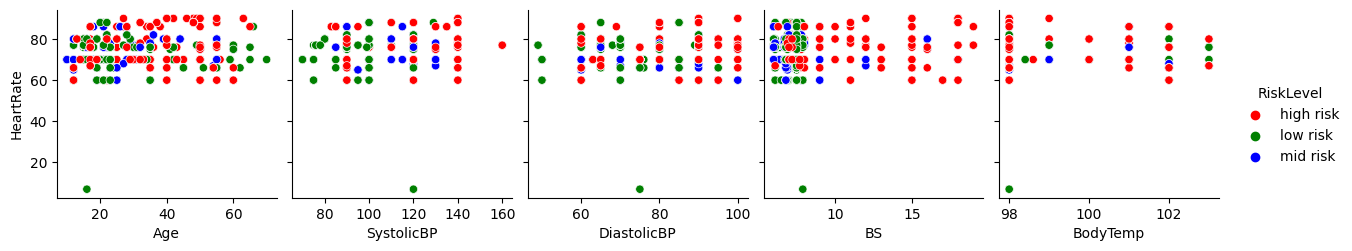

In [18]:
sns.pairplot(df, hue='RiskLevel', palette=risk_color_map, x_vars=["Age", "SystolicBP", "DiastolicBP", "BS", 
                                          "BodyTemp"],  y_vars=["HeartRate"])

In [32]:
from itertools import combinations_with_replacement
options = list(range(1, 6))
print(list(combinations_with_replacement(options, 4)))

[(1, 1, 1, 1), (1, 1, 1, 2), (1, 1, 1, 3), (1, 1, 1, 4), (1, 1, 1, 5), (1, 1, 2, 2), (1, 1, 2, 3), (1, 1, 2, 4), (1, 1, 2, 5), (1, 1, 3, 3), (1, 1, 3, 4), (1, 1, 3, 5), (1, 1, 4, 4), (1, 1, 4, 5), (1, 1, 5, 5), (1, 2, 2, 2), (1, 2, 2, 3), (1, 2, 2, 4), (1, 2, 2, 5), (1, 2, 3, 3), (1, 2, 3, 4), (1, 2, 3, 5), (1, 2, 4, 4), (1, 2, 4, 5), (1, 2, 5, 5), (1, 3, 3, 3), (1, 3, 3, 4), (1, 3, 3, 5), (1, 3, 4, 4), (1, 3, 4, 5), (1, 3, 5, 5), (1, 4, 4, 4), (1, 4, 4, 5), (1, 4, 5, 5), (1, 5, 5, 5), (2, 2, 2, 2), (2, 2, 2, 3), (2, 2, 2, 4), (2, 2, 2, 5), (2, 2, 3, 3), (2, 2, 3, 4), (2, 2, 3, 5), (2, 2, 4, 4), (2, 2, 4, 5), (2, 2, 5, 5), (2, 3, 3, 3), (2, 3, 3, 4), (2, 3, 3, 5), (2, 3, 4, 4), (2, 3, 4, 5), (2, 3, 5, 5), (2, 4, 4, 4), (2, 4, 4, 5), (2, 4, 5, 5), (2, 5, 5, 5), (3, 3, 3, 3), (3, 3, 3, 4), (3, 3, 3, 5), (3, 3, 4, 4), (3, 3, 4, 5), (3, 3, 5, 5), (3, 4, 4, 4), (3, 4, 4, 5), (3, 4, 5, 5), (3, 5, 5, 5), (4, 4, 4, 4), (4, 4, 4, 5), (4, 4, 5, 5), (4, 5, 5, 5), (5, 5, 5, 5)]


In [119]:
X = df[['DiastolicBP', 'Age', 'BS', 'BodyTemp', 'HeartRate']]
y = df['SystolicBP']


reg = LinearRegression().fit(X, y)

efs1 = EFS(reg, 
           min_features=1,
           max_features=5,
           scoring='neg_mean_squared_error',
           print_progress=True,
           cv=8)
efs1 = efs1.fit(X, y)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 31/31

Best accuracy score: -125.12
Best subset (indices): (0, 1, 2, 3)
Best subset (corresponding names): ('DiastolicBP', 'Age', 'BS', 'BodyTemp')


In [138]:
X = df[['Age', 'BS', 'BodyTemp', 'HeartRate']]
y = df['SystolicBP']


reg = LinearRegression().fit(X, y)

efs1 = EFS(reg, 
           min_features=1,
           max_features=4,
           scoring='neg_mean_squared_error',
           print_progress=True,
           cv=8)
efs1 = efs1.fit(X, y)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 15/15

Best accuracy score: -247.70
Best subset (indices): (0, 1, 2, 3)
Best subset (corresponding names): ('Age', 'BS', 'BodyTemp', 'HeartRate')


In [ ]:
# D# D
X = df[['DiastolicBP', 'BS', 'Age']]
y = df['SystolicBP']

kf = KFold(n_splits=8)
for fold_num, (train_index,test_index) in enumerate(kf.split(X)):
    
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]


    reg = LinearRegression().fit(X_train, y_train)

    y_pred = reg.predict(X_test)

    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)

    print(f'Fold number: {fold_num + 1}')
    print(f'Mean squared error {MSE:.2f}')
    print(f'Mean absolute error {MAE:.2f}')
    print(f'Root mean squared error {RMSE:.2f}')
X = df[['DiastolicBP', 'BS', 'Age']]
y = df['SystolicBP']

kf = KFold(n_splits=8)
for fold_num, (train_index,test_index) in enumerate(kf.split(X)):
    
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]


    reg = LinearRegression().fit(X_train, y_train)

    y_pred = reg.predict(X_test)

    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)

    print(f'Fold number: {fold_num + 1}')
    print(f'Mean squared error {MSE:.2f}')
    print(f'Mean absolute error {MAE:.2f}')
    print(f'Root mean squared error {RMSE:.2f}')

C:\Users\Aidan\AppData\Local\Temp\ipykernel_18888\1415188869.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<AxesSubplot: >

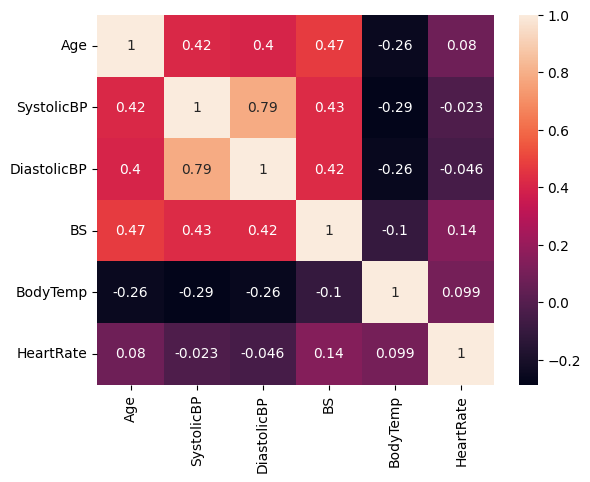

In [4]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True)

In [95]:
# D
X = df[['DiastolicBP', 'Age']]
y = df['SystolicBP']

kf = KFold(n_splits=8, shuffle=True)
for fold_num, (train_index,test_index) in enumerate(kf.split(X)):
    
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]


    reg = LinearRegression().fit(X_train, y_train)

    y_pred = reg.predict(X_test)

    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)

    print(f'Fold number: {fold_num + 1}')
    print(f'Mean squared error {MSE:.2f}')
    print(f'Mean absolute error {MAE:.2f}')
    print(f'Root mean squared error {RMSE:.2f}')

Fold number: 1
Mean squared error 108.10
Mean absolute error 8.05
Root mean squared error 10.40
Fold number: 2
Mean squared error 127.12
Mean absolute error 8.85
Root mean squared error 11.27
Fold number: 3
Mean squared error 118.90
Mean absolute error 8.75
Root mean squared error 10.90
Fold number: 4
Mean squared error 113.86
Mean absolute error 8.59
Root mean squared error 10.67
Fold number: 5
Mean squared error 131.85
Mean absolute error 9.27
Root mean squared error 11.48
Fold number: 6
Mean squared error 135.17
Mean absolute error 9.23
Root mean squared error 11.63
Fold number: 7
Mean squared error 111.42
Mean absolute error 8.69
Root mean squared error 10.56
Fold number: 8
Mean squared error 155.26
Mean absolute error 9.73
Root mean squared error 12.46


In [103]:
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,age_bins
0,25,130,80,15.0,98.0,86,high risk,"[20, 30)"
1,35,140,90,13.0,98.0,70,high risk,"[30, 40)"
2,29,90,70,8.0,100.0,80,high risk,"[20, 30)"
3,30,140,85,7.0,98.0,70,high risk,"[30, 40)"
4,35,120,60,6.1,98.0,76,low risk,"[30, 40)"
...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk,"[20, 30)"
1010,55,120,90,18.0,98.0,60,high risk,"[50, 60)"
1011,35,85,60,19.0,98.0,86,high risk,"[30, 40)"
1012,43,120,90,18.0,98.0,70,high risk,"[40, 50)"


In [106]:
import sklearn
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

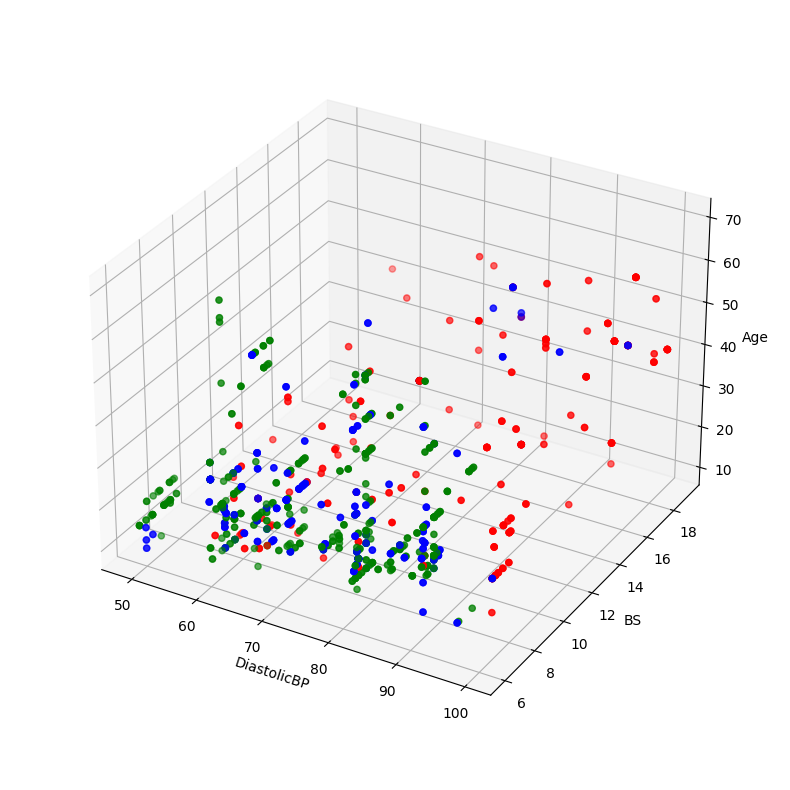

In [6]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(df['DiastolicBP'], df['BS'], df['Age'], c=df['RiskLevel'].map(risk_color_map))
ax.set_xlabel('DiastolicBP')
ax.set_ylabel('BS')
ax.set_zlabel('Age')
ax.set_box_aspect(None, zoom=0.9)
plt.show()

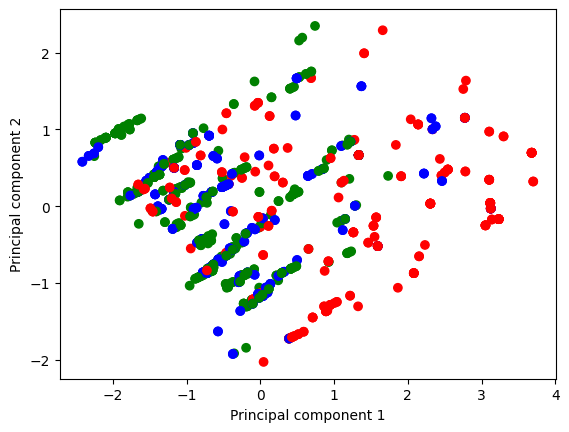

In [7]:
# Principal component analysis to reduce the number of dimensions from 3 to 2 

scaled_X = scale(X) # Data is standardised with mean and variance

pca = PCA(n_components=2) # Initialise the pca
pca.fit(scaled_X)

pca_X = pca.transform(scaled_X) # Convert 

pca_df = pd.DataFrame(pca_X, columns=['PC1', 'PC2'])


mapped = df['RiskLevel'].map(risk_color_map)

plt.scatter(pca_df['PC1'].values, pca_df['PC2'].values, c=mapped)

plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.show()

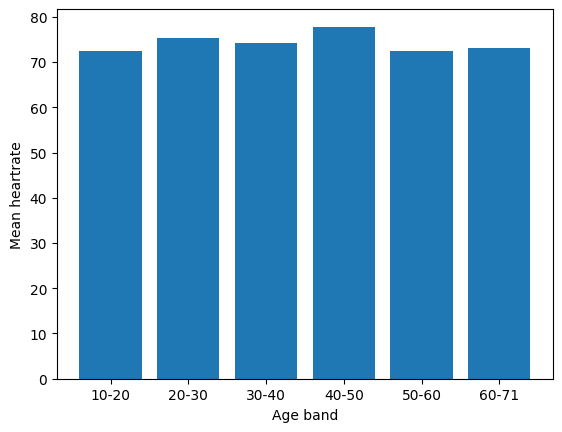

In [8]:
df['age_bins'] = pd.cut(df['Age'], bins=[10, 20, 30, 40, 50, 60, 71], right=False)

age_group_means = df.groupby('age_bins')['HeartRate'].mean()

age_group_means_labels = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-71']

plt.bar(age_group_means_labels, age_group_means.values)

plt.xlabel('Age band')
plt.ylabel('Mean heartrate')
plt.show()

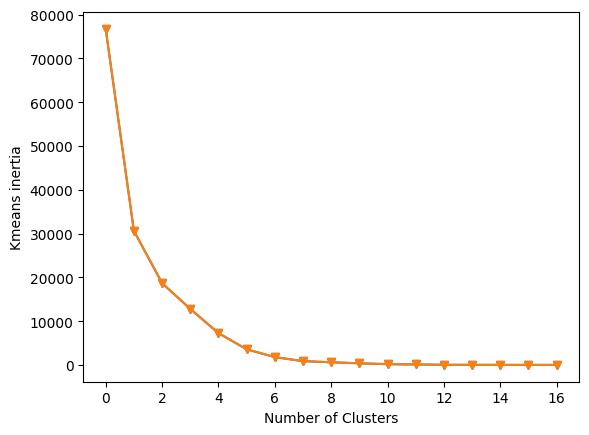

In [16]:
# Find clusters of patients with similar Systolic BP.

num_clusters = np.arange(2, 19, 1)

kmeans_elbow_values = []
kmeans_silhouette_scores = []

for num_cluster in num_clusters:
    kmeans = KMeans(n_clusters=num_cluster, random_state=0).fit(df[['SystolicBP']])
    kmeans_elbow_values.append(kmeans.inertia_)
    current_silhouette_score = silhouette_score(df[['SystolicBP']], kmeans.labels_)
    kmeans_silhouette_scores.append(current_silhouette_score)
    
    # save the clustering labesl for 
    if num_cluster == 2:
        df['Kmeans_labels_2_clusters'] = kmeans.labels_
        
    elif num_cluster == 3:
        df['Kmeans_labels_3_clusters'] = kmeans.labels_
        
plt.plot(kmeans_elbow_values, marker='v')
plt.xlabel('Number of Clusters')
plt.ylabel('Kmeans inertia')
plt.show()

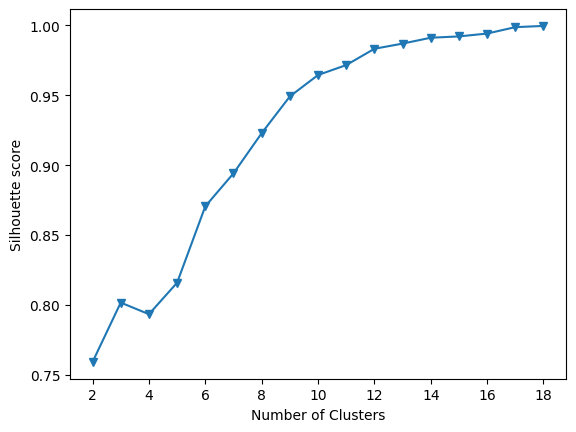

In [17]:
# Plot showing how the silhouette score varies with number of clusters

plt.plot(num_clusters, kmeans_silhouette_scores, marker='v')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette score')
plt.show()

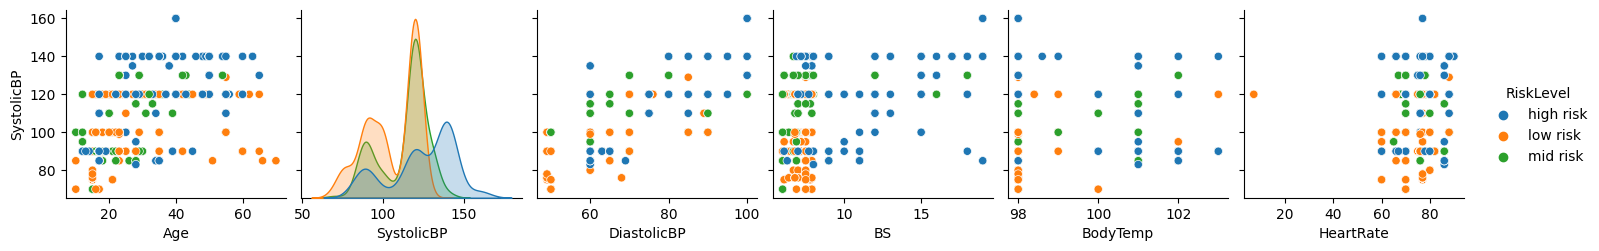

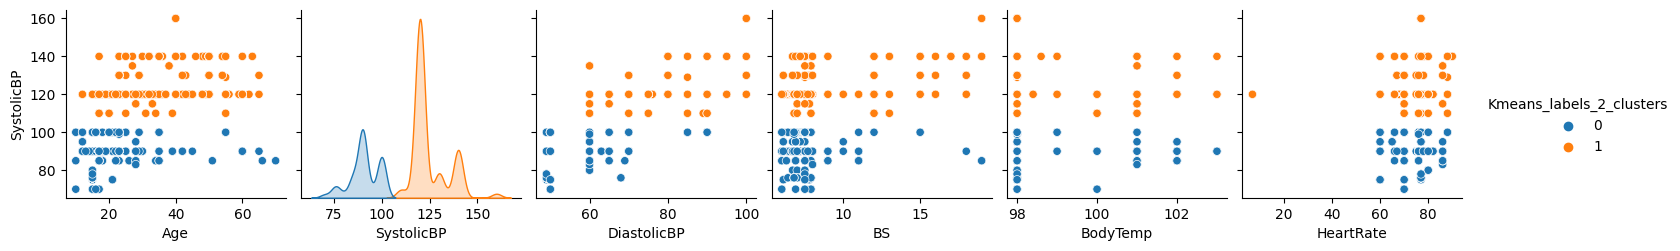

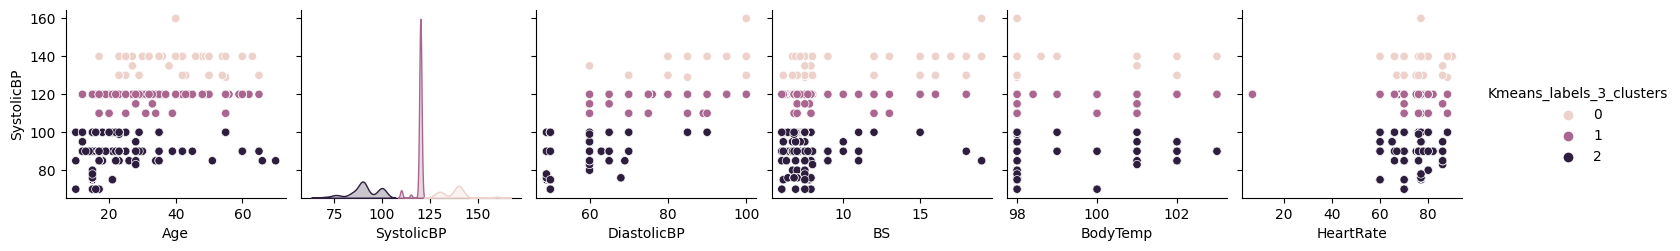

In [18]:
sns.pairplot(df, hue='RiskLevel', x_vars=["Age", "SystolicBP", "DiastolicBP", "BS", 
                                          "BodyTemp", "HeartRate"], y_vars=["SystolicBP"])

sns.pairplot(df, hue='Kmeans_labels_2_clusters', x_vars=["Age", "SystolicBP", "DiastolicBP", "BS", 
                                          "BodyTemp", "HeartRate"], y_vars=["SystolicBP"])

sns.pairplot(df, hue='Kmeans_labels_3_clusters', x_vars=["Age", "SystolicBP", "DiastolicBP", "BS", 
                                          "BodyTemp", "HeartRate"],  y_vars=["SystolicBP"])
plt.show()

In [19]:
# High systolic > 140, High diastolic > 90
# Mid systolic 110 - 140, Mid distolic 70 - 90 
# Low systolic < 110, Low diastolic < 70

# Association Pattern Mining
# High systolic and High diastolic

def support_cal(freq, total):
    support = freq/total
    return support

def confidence_cal(freq, freq_a):
    confidence = freq/freq_a
    return confidence

def conviction_cal(sup_b, conf_a_b):
    try:
        conviction = (1 - sup_b)/(1 - conf_a_b)
    except ZeroDivisionError:
        conviction = 'inf'
    return conviction

def lift_cal(sup_a_b, sup_a, sup_b):
    lift = sup_a_b/(sup_a*sup_b)
    return lift

In [20]:
# Association Pattern Mining
# High systolic and High diastolic

total = len(df)

freq_high_and_high =  len(df[(df['SystolicBP'] > 140) & (df['DiastolicBP'] > 90)])

freq_sys_high = len(df[df['SystolicBP'] > 140])
freq_dis_high = len(df[df['DiastolicBP'] > 90])
                  
sup_sys_high = support_cal(freq_sys_high, total)
sup_dis_high = support_cal(freq_dis_high, total)
       
sup_high_and_high = support_cal(freq_high_and_high, total)
conf_high_and_high = confidence_cal(freq_high_and_high, freq_sys_high)
conv_high_and_high = conviction_cal(sup_dis_high, conf_high_and_high)
lift_high_and_high = lift_cal(sup_high_and_high, sup_sys_high, sup_dis_high)
    

print(f'Support for high SystolicBP and high DiastolicBP = {sup_high_and_high:.6f}')
print(f'Confidence for high SystolicBP and high DiastolicBP = {conf_high_and_high}')
print(f'Conviction for high SystolicBP and high DiastolicBP = {conv_high_and_high}')
print(f'Lift for high SystolicBP and high DiastolicBP = {lift_high_and_high:.2f}')

Support for high SystolicBP and high DiastolicBP = 0.009862
Confidence for high SystolicBP and high DiastolicBP = 1.0
Conviction for high SystolicBP and high DiastolicBP = inf
Lift for high SystolicBP and high DiastolicBP = 8.24


In [21]:
# Association Pattern Mining
# Mid systolic and Mid diastolic

freq_mid_and_mid =  len(df[((df['SystolicBP'] > 110) & (df['SystolicBP'] < 140) & 
                              (df['DiastolicBP'] > 70) & (df['DiastolicBP'] < 90))])

freq_sys_mid = len(df[(df['SystolicBP'] > 110) & (df['SystolicBP'] < 140)])
freq_dis_mid = len(df[(df['DiastolicBP'] > 70) & (df['DiastolicBP'] < 90)])

sup_sys_mid = support_cal(freq_sys_mid, total)
sup_dis_mid = support_cal(freq_dis_mid, total)
       
sup_high_and_high = support_cal(freq_mid_and_mid, total)
conf_mid_and_mid = confidence_cal(freq_mid_and_mid, freq_sys_mid)
conv_mid_and_mid = conviction_cal(sup_dis_mid, conf_mid_and_mid)
lift_mid_and_mid = lift_cal(freq_mid_and_mid, sup_sys_mid, sup_dis_mid)

print(f'Support for mid SystolicBP and mid DiastolicBP = {sup_high_and_high:.6f}')
print(f'Confidence for mid SystolicBP and mid DiastolicBP = {conf_mid_and_mid:.2f}')
print(f'Conviction for mid SystolicBP and mid DiastolicBP = {conv_mid_and_mid:.2f}')
print(f'Lift for mid SystolicBP and mid DiastolicBP = {lift_mid_and_mid:.2f}')

Support for mid SystolicBP and mid DiastolicBP = 0.278107
Confidence for mid SystolicBP and mid DiastolicBP = 0.54
Conviction for mid SystolicBP and mid DiastolicBP = 1.50
Lift for mid SystolicBP and mid DiastolicBP = 1755.61


In [22]:
# Association Pattern Mining
# Low systolic and Low diastolic

freq_low_and_low =  len(df[(df['SystolicBP'] < 110) & (df['DiastolicBP'] < 70)])

freq_sys_low = len(df[df['SystolicBP'] < 110])
freq_dis_low = len(df[df['DiastolicBP'] < 70])

sup_sys_low = support_cal(freq_sys_low, total)
sup_dis_low = support_cal(freq_dis_low, total)
       
sup_low_and_low = support_cal(freq_low_and_low, total)
conf_low_and_low = confidence_cal(freq_low_and_low, freq_sys_low)
conv_low_and_low = conviction_cal(sup_dis_low, conf_low_and_low)
lift_low_and_low = lift_cal(freq_low_and_low, sup_sys_low, sup_dis_low)

print(f'Support for low SystolicBP and low DiastolicBP = {sup_low_and_low:.6f}')
print(f'Confidence for low SystolicBP and low DiastolicBP = {conf_low_and_low:.2f}')
print(f'Conviction for low SystolicBP and low DiastolicBP = {conv_low_and_low:.2f}')
print(f'Lift for low SystolicBP and low DiastolicBP = {lift_low_and_low:.2f}')

Support for low SystolicBP and low DiastolicBP = 0.266272
Confidence for low SystolicBP and low DiastolicBP = 0.78
Conviction for low SystolicBP and low DiastolicBP = 3.18
Lift for low SystolicBP and low DiastolicBP = 2514.06


In [23]:
# Correlation statistics between age and SystolicBP.

age_sys_pearsonr = stats.pearsonr(df['Age'], df['SystolicBP']).statistic
age_sys_pearsonr_pval = stats.pearsonr(df['Age'], df['SystolicBP']).pvalue

age_sys_kendalltau = stats.kendalltau(df['Age'], df['SystolicBP']).correlation
age_sys_kendalltau_pval = stats.kendalltau(df['Age'], df['SystolicBP']).pvalue

age_sys_spearmanr = stats.spearmanr(df['Age'], df['SystolicBP']).correlation
age_sys_spearmanr_pval = stats.spearmanr(df['Age'], df['SystolicBP']).pvalue

print(f'Personr value = {age_sys_pearsonr:.3f} with pvalue = {age_sys_pearsonr_pval}')
print(f'Kendalltau value = {age_sys_kendalltau:.3f} with pvalue = {age_sys_kendalltau_pval}')
print(f'Spearmanr value = {age_sys_spearmanr:.3f} with pvalue = {age_sys_spearmanr_pval}')

Personr value = 0.416 with pvalue = 1.025502775260071e-43
Kendalltau value = 0.370 with pvalue = 3.987165555100136e-56
Spearmanr value = 0.485 with pvalue = 6.217295712082083e-61


In [ ]:
# https://www.di.uminho.pt/~pja/ps/conviction.pdf
# Equations for rule associations

# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5969114/